# TP 01 : Linear Regression

Libraries importations

In [7]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error

# Preprocissing Part : generate date (X , Y), Cleaning 

Loading boston data :

In [8]:
boston=load_boston()

showing the content of boston dataset :

In [10]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

Keys names : 

In [12]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

show just the Target : 

In [13]:
boston['target']

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [69]:
# his shape : 
print("dimentions = (rows : {} , Columns : 1)".format(boston['target'].shape[0] ))

dimentions = (rows : 506 , Columns : 1)


Making dataFrame via boston dataset 

In [26]:
df_X = pd.DataFrame(boston.data , columns= boston.feature_names)
df_X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


illustrate the 3 first lines , and 3 last lines from owr data Frame : (our features)

In [36]:
df_X.head(3) # 3 first lines

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [37]:
df_X.tail(3) # 3 last lines

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


Generate our target (variable cible y)

In [39]:
df_Y=pd.DataFrame(boston.target)

In [43]:
df_Y.head(5)

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


# Machine Learning Part : make model , fit model, and prediction

In [45]:
# importation 
from sklearn.linear_model import LinearRegression

create model

In [47]:

model = LinearRegression()

In [48]:
model

LinearRegression()

### devising our dataset on two part : 
###### first part (x_train , y_train) for fitting our model
###### second part (x_test , y_test) to making predictions and evaluating our model (Testing our model performation )

In [52]:
x_train , x_test , y_train , y_test = train_test_split(df_X , df_Y , test_size=0.2 )

sizes : 

In [59]:
print("Training Set Dimentional : (X_train) : " , x_train.shape)
print("Training Set Dimentional : (Y_train) : " , y_train.shape)
print("Test Set size : (X_test) : " , x_test.shape)
print("Test Set size : (Y_test) : " , y_test.shape)

Training Set Dimentional : (X_train) :  (404, 13)
Training Set Dimentional : (Y_train) :  (404, 1)
Test Set size : (X_test) :  (102, 13)
Test Set size : (Y_test) :  (102, 1)


the Fit of model (training)

In [65]:
model.fit(x_train , y_train)

LinearRegression()

make predictions (predect the houses prices)

In [66]:
preditions = model.predict(x_test)

In [67]:
preditions

array([[14.86069034],
       [24.91677969],
       [16.12462015],
       [22.29205472],
       [30.20322529],
       [26.11436883],
       [17.45063065],
       [22.79715343],
       [21.62659465],
       [19.53164829],
       [21.23342892],
       [27.52401156],
       [30.20570406],
       [ 6.50173992],
       [10.19223808],
       [21.73821089],
       [19.91098793],
       [16.0842855 ],
       [ 7.09174704],
       [22.67541201],
       [22.05516084],
       [19.83727274],
       [15.61118703],
       [21.25192564],
       [36.77510175],
       [19.03647854],
       [16.60032263],
       [32.99264322],
       [20.96018379],
       [27.73016334],
       [18.16833277],
       [18.09773252],
       [30.91304654],
       [41.4138249 ],
       [20.25770222],
       [17.70546748],
       [15.71086381],
       [18.89152645],
       [11.24198949],
       [21.09470164],
       [18.21065711],
       [ 2.83775936],
       [19.61737648],
       [23.91941331],
       [23.98479602],
       [21

In [68]:
y_test

,0
416,7.5
1,21.6
22,15.2
6,22.9
183,32.5
...,...
373,13.8
289,24.8
240,22.0
266,30.7


### Mean Square Error : It presents sum of error between reels values of houses prince and their predictions values

In [73]:
MSE = np.mean((y_test - preditions)**2)

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [74]:
MSE

0    36.217699
dtype: float64

In [75]:
 mean_squared_error(y_test,preditions)

36.2176989558263

# Applied the Linear regression in Dataset CSV : 

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [99]:
dataset = pd.read_csv('valeurs_trimestrielles.csv',sep=';' )
dataset.head(6)

,Periode,Indice
0,67,129.72
1,68,129.38
2,66,129.03
3,66,128.45
4,65,127.77
5,64,127.22


In [102]:
x = dataset.iloc[:,:-1].values 
y = dataset.iloc[:, -1].values
x.shape , y.shape

((67, 1), (67,))

In [103]:
# from sklearn.model_selection import train_test_split
x_tr , x_test , y_tr , y_test = train_test_split(x , y , train_size=0.7)

In [104]:
# fiting model : 
md = linear_model.LinearRegression().fit(x_tr , y_tr)

In [105]:
predt = md.predict(x_test)

In [106]:
predt

array([115.84161406, 116.57362356, 111.08355229, 112.5475713 ,
       109.61953329, 126.45575185, 118.40364732, 128.2857756 ,
       108.88752379, 130.84780886, 126.0897471 , 119.13565682,
       130.11579936, 122.06369483, 129.01778511, 112.91357605,
       109.98553804, 114.0115903 , 124.62572809, 120.59967583,
       130.11579936])

Plotting our points (x , y )

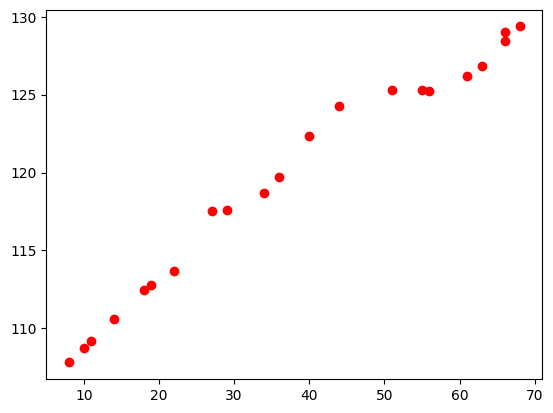

In [107]:
plt.scatter(x_test, y_test, color = 'red')

Plot x , predictions

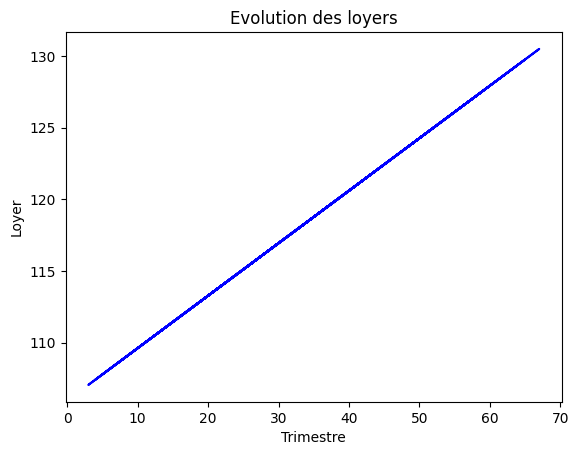

In [110]:
plt.plot(x_tr, md.predict(x_tr), color = 'blue') 
plt.title('Evolution des loyers')
plt.xlabel('Trimestre')
plt.ylabel('Loyer')
plt.show()

Visualisation our model 

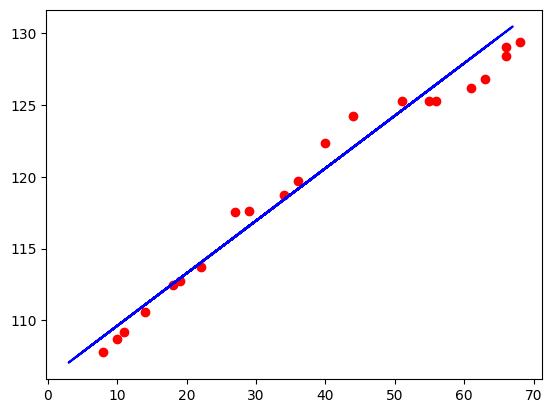

In [111]:
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_tr, md.predict(x_tr), color = 'blue') 

# Evaluation : accuracy , f score 

In [112]:
from sklearn.metrics  import mean_squared_error
print('Mean Square Error  =  ' , mean_squared_error(y_test , predt))

Mean Square Error  =   1.5762530374452282


# Fin.